In [311]:
import zipfile 

zip_file_path = '/Users/shamiksinha/Desktop/cmm assignment/Data.zip'

# Extracting the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('dataset')

Excel file 'pupil_reaction_averages.xlsx' with right-to-left orientation has been created.


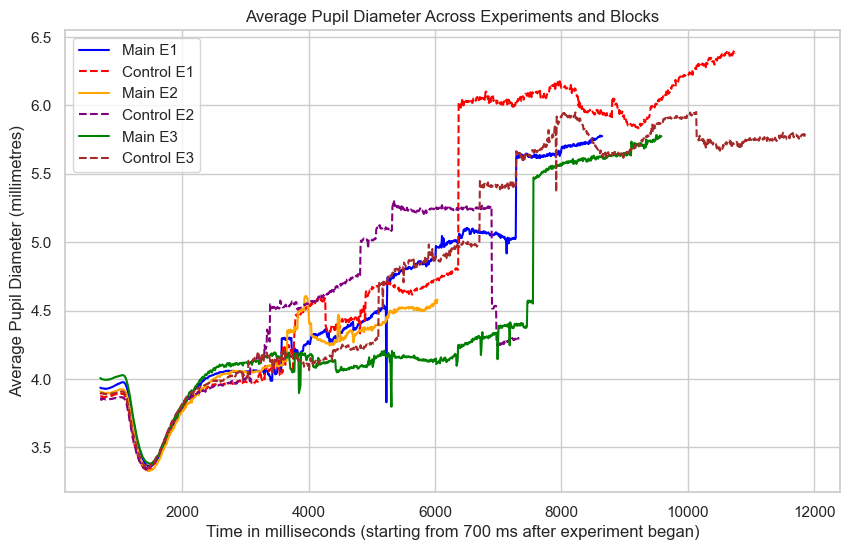

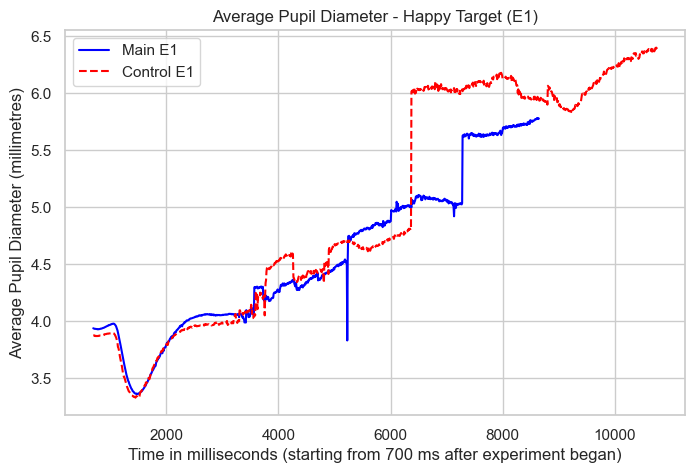

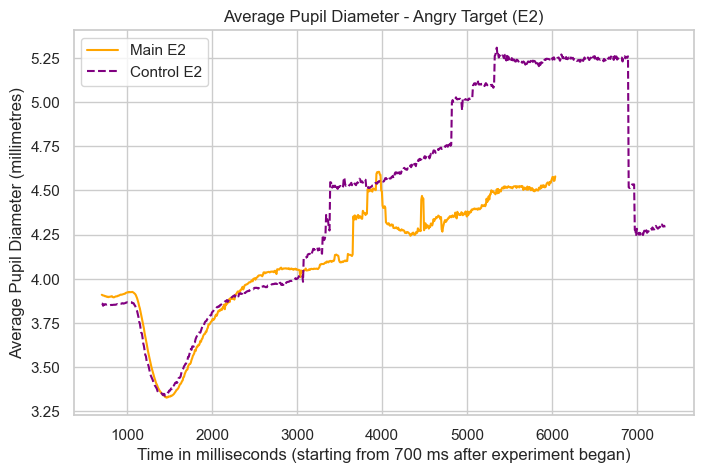

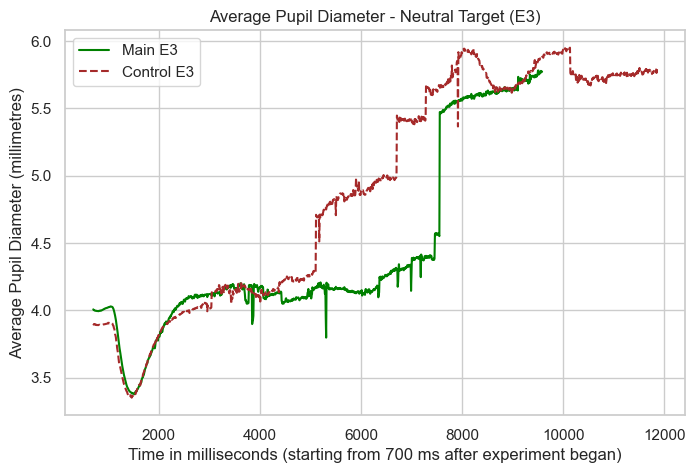

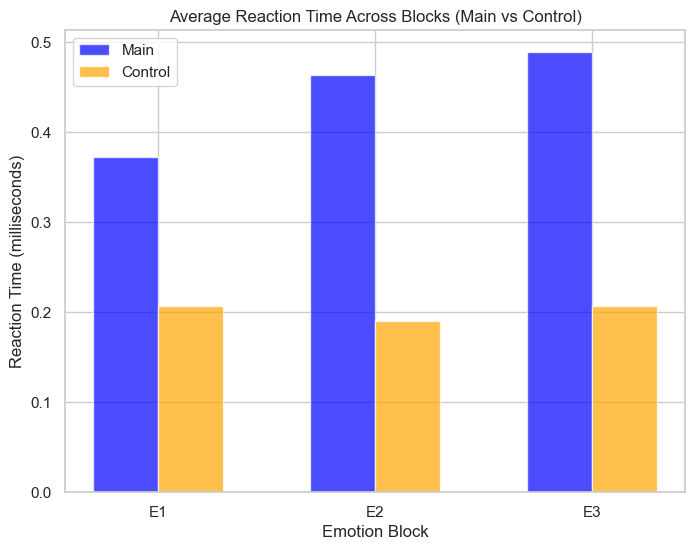

In [312]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
data_folder = "/Users/shamiksinha/Desktop/cmm assignment/7"
# data_folder = "/Users/shamiksinha/Desktop/cmm assignment/dataset/14"

pupil_data_main = {'E1': [], 'E2': [], 'E3': []}
pupil_data_control = {'E1': [], 'E2': [], 'E3': []}
reaction_times_main = {'E1': [], 'E2': [], 'E3': []}
reaction_times_control = {'E1': [], 'E2': [], 'E3': []}


def process_csv(file_path, experiment_type, block):
    df = pd.read_csv(file_path)
   
    pupil_diameter_data = df.iloc[:, 89:-1].apply(pd.to_numeric)
    pupil_diameter_data = pupil_diameter_data.mean(axis=0)
    
    # Drop NaN values
    # pupil_diameter_data = pupil_diameter_data.dropna()

    if experiment_type == 'Main':
        pupil_data_main[block].append(pupil_diameter_data)
    elif experiment_type == 'Control':
        pupil_data_control[block].append(pupil_diameter_data)
    
    # Reaction Time column
    if 'response_time' in df.columns:
        reaction_times = pd.to_numeric(df['response_time']).dropna().values
        if experiment_type == 'Main':
            reaction_times_main[block].extend(reaction_times)
        elif experiment_type == 'Control':
            reaction_times_control[block].extend(reaction_times)
 
for participant_folder in os.listdir(data_folder):
    participant_path = os.path.join(data_folder, participant_folder)
    if os.path.isdir(participant_path):
        for experiment_type in ['Main', 'Control']:
            experiment_path = os.path.join(participant_path, experiment_type)
            if os.path.isdir(experiment_path):
                for block in ['E1', 'E2', 'E3']:
                    block_path = os.path.join(experiment_path, block, 'Copy of target.csv')
                    if os.path.isfile(block_path):
                        process_csv(block_path, experiment_type, block)
                        
# Calculate averages across participants for each block and experiment
avg_pupil_main = {block: pd.concat(pupil_data_main[block], axis=1).mean(axis=1) for block in pupil_data_main}
avg_pupil_control = {block: pd.concat(pupil_data_control[block], axis=1).mean(axis=1) for block in pupil_data_control}

avg_reaction_main = {block: np.median(reaction_times_main[block]) for block in reaction_times_main}
avg_reaction_control = {block: np.median(reaction_times_control[block]) for block in reaction_times_control}



# Prepare the data for writing to an Excel file
avg_pupil_main_df = pd.DataFrame(avg_pupil_main)
avg_pupil_control_df = pd.DataFrame(avg_pupil_control)
avg_reaction_main_df = pd.DataFrame(list(avg_reaction_main.items()), columns=['Block', 'Median Reaction Time (Main)'])
avg_reaction_control_df = pd.DataFrame(list(avg_reaction_control.items()), columns=['Block', 'Median Reaction Time (Control)'])


with pd.ExcelWriter('pupil_reaction_averages.xlsx') as writer:
    avg_pupil_main_df.T.to_excel(writer, sheet_name='Avg Pupil Diameter Main', index=False)
    avg_pupil_control_df.T.to_excel(writer, sheet_name='Avg Pupil Diameter Control', index=False)
    avg_reaction_main_df.T.to_excel(writer, sheet_name='Avg Reaction Time Main', index=False)
    avg_reaction_control_df.T.to_excel(writer, sheet_name='Avg Reaction Time Control', index=False)

print("Excel file 'pupil_reaction_averages.xlsx' with right-to-left orientation has been created.")




#########################################################################
# def drop_nan_columns_from_end(series_list):  
#     while str(series_list[-1]) == 'nan':
#         series_list = series_list[:-1]
#     return series_list

# avg_pupil_main = {
#     block: drop_nan_columns_from_end(pd.concat(pupil_data_main[block], axis=1).mean(axis=1))
#     for block in avg_pupil_main
# }

# avg_pupil_control = {
#     block: drop_nan_columns_from_end(pd.concat(pupil_data_control[block], axis=1).mean(axis=1))
#     for block in avg_pupil_control
# }

# def repMedian(series_list):  
#     median_value = series_list.median()

#     # Replace NaN values with the median
#     series_list = series_list.fillna(median_value)
    
#     return series_list

# avg_pupil_main = {
#     block: repMedian(pd.concat(pupil_data_main[block], axis=1).mean(axis=1))
#     for block in avg_pupil_main
# }

# avg_pupil_control = {
#     block: repMedian(pd.concat(pupil_data_control[block], axis=1).mean(axis=1))
#     for block in avg_pupil_control
# }

###################################################################

#################################################################

# min_length_main = min(len(data) for data in avg_pupil_main.values())
# min_length_control = min(len(data) for data in avg_pupil_control.values())

# min_length = min(min_length_main, min_length_control) 

# avg_pupil_main = {block: data.iloc[:min_length] for block, data in avg_pupil_main.items()}
# avg_pupil_control = {block: data.iloc[:min_length] for block, data in avg_pupil_control.items()}

# def drop_nan_columns_from_end(series_list):  
#     while str(series_list[-1]) == 'nan':
#         series_list = series_list[:-1]
#     return series_list

# avg_pupil_main = {
#     block: drop_nan_columns_from_end(pd.concat(pupil_data_main[block], axis=1).mean(axis=1))[:min_length]
#     for block in avg_pupil_main
# }

# avg_pupil_control = {
#     block: drop_nan_columns_from_end(pd.concat(pupil_data_control[block], axis=1).mean(axis=1))[:min_length]
#     for block in avg_pupil_control
# }

# min_length_main = min(len(data) for data in avg_pupil_main.values())
# min_length_control = min(len(data) for data in avg_pupil_control.values())

# min_length = min(min_length_main, min_length_control) 

# avg_pupil_main = {block: data.iloc[:min_length] for block, data in avg_pupil_main.items()}
# avg_pupil_control = {block: data.iloc[:min_length] for block, data in avg_pupil_control.items()}


################################################################

plt.figure(figsize=(10, 6))

main_colors = ['blue', 'orange', 'green']
control_colors = ['red', 'purple', 'brown']

# Starting time and time interval
start_time = 700  # starting at 700 ms
time_interval = 8  # 8 ms interval

blocks = ['E1', 'E2', 'E3']
for i, block in enumerate(blocks): 
    num_points_main = len(avg_pupil_main[block])
    num_points_control = len(avg_pupil_control[block])  
    
    time_points_main = [start_time + j * time_interval for j in range(num_points_main)]
    time_points_control = [start_time + j * time_interval for j in range(num_points_control)]  
    plt.plot(time_points_main, avg_pupil_main[block].values, label=f'Main {block}', color=main_colors[i], linestyle='-') 
    plt.plot(time_points_control, avg_pupil_control[block].values, label=f'Control {block}', color=control_colors[i], linestyle='--')

plt.xlabel('Time in milliseconds (starting from 700 ms after experiment began)')
plt.ylabel('Average Pupil Diameter (millimetres)')
plt.title('Average Pupil Diameter Across Experiments and Blocks')
plt.legend()
plt.show()
 
blocks = ['E1', 'E2', 'E3']
titles = ['Happy Target (E1)', 'Angry Target (E2)', 'Neutral Target (E3)']
main_colors = ['blue', 'orange', 'green'] 
control_colors = ['red', 'purple', 'brown'] 

for i, block in enumerate(blocks):
     
    num_points_main = len(avg_pupil_main[block])
    num_points_control = len(avg_pupil_control[block])
    
    time_points_main = [700 + j * 8 for j in range(num_points_main)]
    time_points_control = [700 + j * 8 for j in range(num_points_control)]
    
    plt.figure(figsize=(8, 5))
    plt.plot(time_points_main, avg_pupil_main[block].values, label=f'Main {block}', color=main_colors[i], linestyle='-')
    plt.plot(time_points_control, avg_pupil_control[block].values, label=f'Control {block}', color=control_colors[i], linestyle='--')
    
    plt.xlabel('Time in milliseconds (starting from 700 ms after experiment began)')
    plt.ylabel('Average Pupil Diameter (millimetres)')
    plt.title(f'Average Pupil Diameter - {titles[i]}')
    plt.legend()
    plt.show()

blocks = ['E1', 'E2', 'E3']
reaction_main = [avg_reaction_main[block] for block in blocks]
reaction_control = [avg_reaction_control[block] for block in blocks]
 
if len(reaction_main) == len(reaction_control) == len(blocks):
    plt.figure(figsize=(8, 6))
    x = np.arange(len(blocks))
 
    plt.bar(x - 0.15, reaction_main, width=0.3, color='blue', label='Main', alpha=0.7)
    plt.bar(x + 0.15, reaction_control, width=0.3, color='orange', label='Control', alpha=0.7)
 
    plt.xticks(x, blocks)
    plt.xlabel('Emotion Block')
    plt.ylabel('Reaction Time (milliseconds)')
    plt.title('Average Reaction Time Across Blocks (Main vs Control)')
    plt.legend()
    
    plt.show()
else:
    print("Error: Reaction times for Main and Control do not have the same length.")


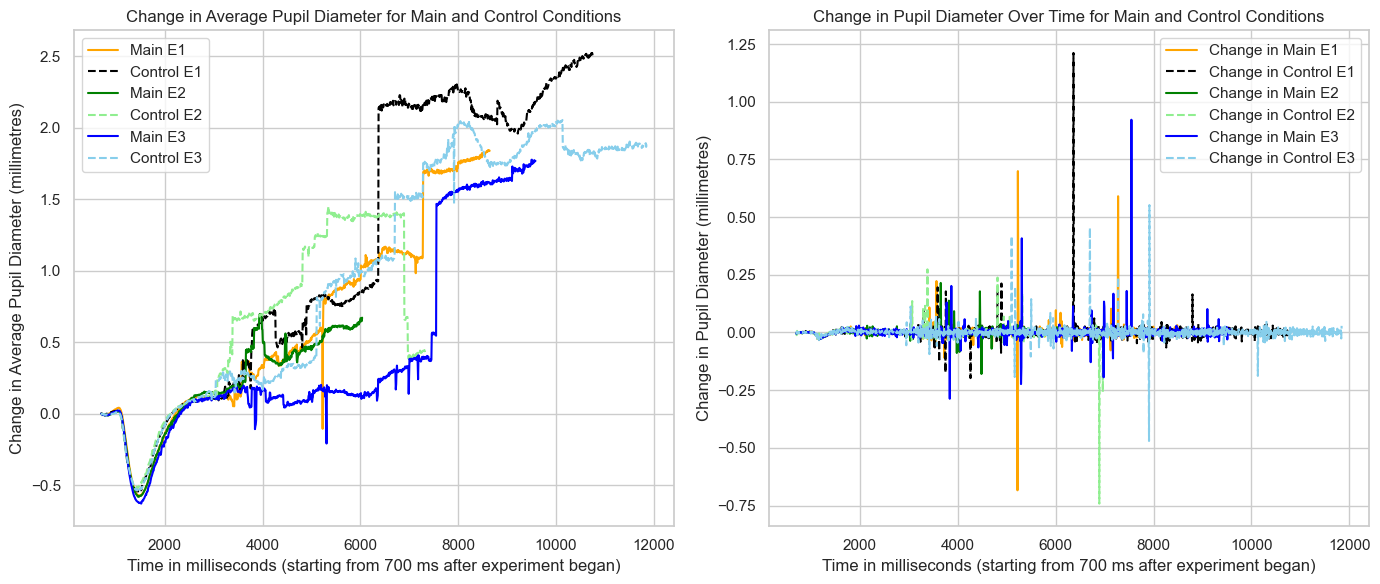

In [313]:
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
 
main_colors = ['orange', 'green', 'blue', 'purple']
control_colors = ['black', 'lightgreen', 'skyblue', 'pink']
 
start_time = 700 
time_interval = 8  
 
for i, block in enumerate(avg_pupil_main.keys()):
 
    num_points_main = len(avg_pupil_main[block])
    time_points_main = [start_time + j * time_interval for j in range(num_points_main)]
    first_value_main = avg_pupil_main[block].values[0]
    normalized_values_main = avg_pupil_main[block].values - first_value_main
    axes[0].plot(time_points_main, normalized_values_main, label=f'Main {block}', color=main_colors[i % len(main_colors)], linestyle='-')
 
    num_points_control = len(avg_pupil_control[block])
    time_points_control = [start_time + j * time_interval for j in range(num_points_control)]
    first_value_control = avg_pupil_control[block].values[0]
    normalized_values_control = avg_pupil_control[block].values - first_value_control
    axes[0].plot(time_points_control, normalized_values_control, label=f'Control {block}', color=control_colors[i % len(control_colors)], linestyle='--')

axes[0].set_xlabel('Time in milliseconds (starting from 700 ms after experiment began)')
axes[0].set_ylabel('Change in Average Pupil Diameter (millimetres)')
axes[0].set_title('Change in Average Pupil Diameter for Main and Control Conditions')
axes[0].legend()
 
for i, block in enumerate(avg_pupil_main.keys()): 
    num_points_main = len(avg_pupil_main[block])
    time_points_main = [start_time + j * time_interval for j in range(num_points_main - 1)]
    pupil_diameter_changes_main = [
        avg_pupil_main[block].values[j+1] - avg_pupil_main[block].values[j]
        for j in range(num_points_main - 1)
    ]
    axes[1].plot(time_points_main, pupil_diameter_changes_main, label=f'Change in Main {block}', color=main_colors[i % len(main_colors)], linestyle='-')
 
    num_points_control = len(avg_pupil_control[block])
    time_points_control = [start_time + j * time_interval for j in range(num_points_control - 1)]
    pupil_diameter_changes_control = [
        avg_pupil_control[block].values[j+1] - avg_pupil_control[block].values[j]
        for j in range(num_points_control - 1)
    ]
    axes[1].plot(time_points_control, pupil_diameter_changes_control, label=f'Change in Control {block}', color=control_colors[i % len(control_colors)], linestyle='--')

axes[1].set_xlabel('Time in milliseconds (starting from 700 ms after experiment began)')
axes[1].set_ylabel('Change in Pupil Diameter (millimetres)')
axes[1].set_title('Change in Pupil Diameter Over Time for Main and Control Conditions')
axes[1].legend()
 
plt.tight_layout() 
plt.show()


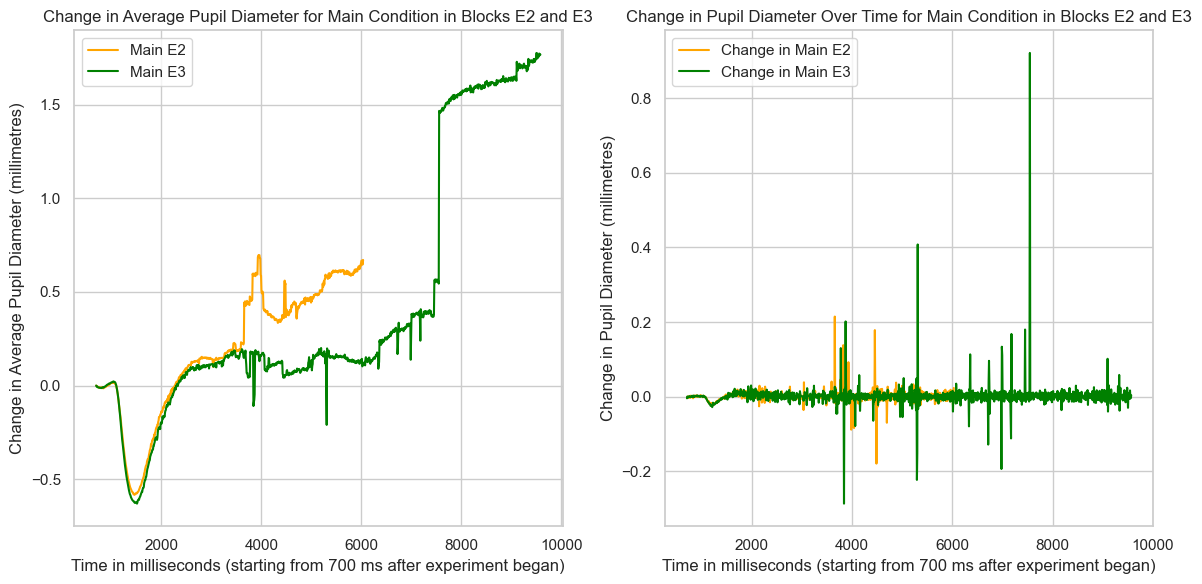

In [314]:
import matplotlib.pyplot as plt
 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
 
main_colors = ['orange', 'green']
 
start_time = 700 
time_interval = 8 
 
blocks = ['E2', 'E3']
 
for i, block in enumerate(blocks):
    num_points_main = len(avg_pupil_main[block])
    time_points_main = [start_time + j * time_interval for j in range(num_points_main)]
    first_value = avg_pupil_main[block].values[0]
    normalized_values = avg_pupil_main[block].values - first_value
    axes[0].plot(time_points_main, normalized_values, label=f'Main {block}', color=main_colors[i], linestyle='-')

axes[0].set_xlabel('Time in milliseconds (starting from 700 ms after experiment began)')
axes[0].set_ylabel('Change in Average Pupil Diameter (millimetres)')
axes[0].set_title('Change in Average Pupil Diameter for Main Condition in Blocks E2 and E3')
axes[0].legend()
 
for i, block in enumerate(blocks):
    num_points_main = len(avg_pupil_main[block])
    time_points_main = [start_time + j * time_interval for j in range(num_points_main - 1)]
    pupil_diameter_changes = [avg_pupil_main[block].values[j+1] - avg_pupil_main[block].values[j] for j in range(num_points_main - 1)]
    axes[1].plot(time_points_main, pupil_diameter_changes, label=f'Change in Main {block}', color=main_colors[i], linestyle='-')

axes[1].set_xlabel('Time in milliseconds (starting from 700 ms after experiment began)')
axes[1].set_ylabel('Change in Pupil Diameter (millimetres)')
axes[1].set_title('Change in Pupil Diameter Over Time for Main Condition in Blocks E2 and E3')
axes[1].legend()
 
plt.tight_layout()   
plt.show()


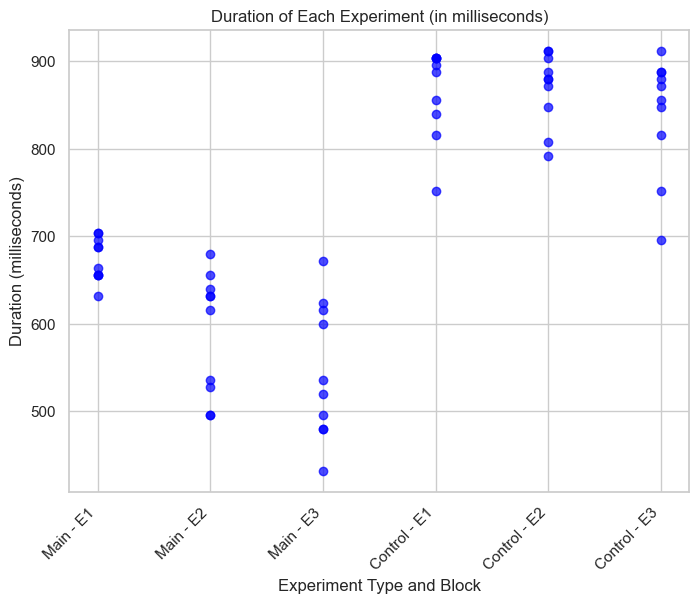

In [315]:
import os
import pandas as pd
import matplotlib.pyplot as plt

data_folder = "/Users/shamiksinha/Desktop/cmm assignment/dataset/14"
 
experiment_durations = {'Main': {'E1': [], 'E2': [], 'E3': []},
                        'Control': {'E1': [], 'E2': [], 'E3': []}}

def calculate_experiment_duration(file_path, experiment_type, block):
    df = pd.read_csv(file_path)
    num_time_points = df.iloc[:, -1].values[-1][1:]
    duration_ms = int(num_time_points) * 8  

    experiment_durations[experiment_type][block].append(duration_ms)
 
for participant_folder in os.listdir(data_folder):
    participant_path = os.path.join(data_folder, participant_folder)
    if os.path.isdir(participant_path):
        for experiment_type in ['Main', 'Control']:
            experiment_path = os.path.join(participant_path, experiment_type)
            if os.path.isdir(experiment_path):
                for block in ['E1', 'E2', 'E3']:
                    block_path = os.path.join(experiment_path, block, 'Copy of target.csv')
                    if os.path.isfile(block_path):
                        calculate_experiment_duration(block_path, experiment_type, block)


plt.figure(figsize=(8, 6))

experiment_labels = []
durations = []

for experiment_type in ['Main', 'Control']:
    for block in ['E1', 'E2', 'E3']:
        for duration in experiment_durations[experiment_type][block]:
            experiment_labels.append(f'{experiment_type} - {block}')
            durations.append(duration)
 
plt.scatter(experiment_labels, durations, color='blue', alpha=0.7)
 
plt.xlabel('Experiment Type and Block')
plt.ylabel('Duration (milliseconds)')
plt.title('Duration of Each Experiment (in milliseconds)')
 
plt.xticks(rotation=45, ha='right')

plt.show()


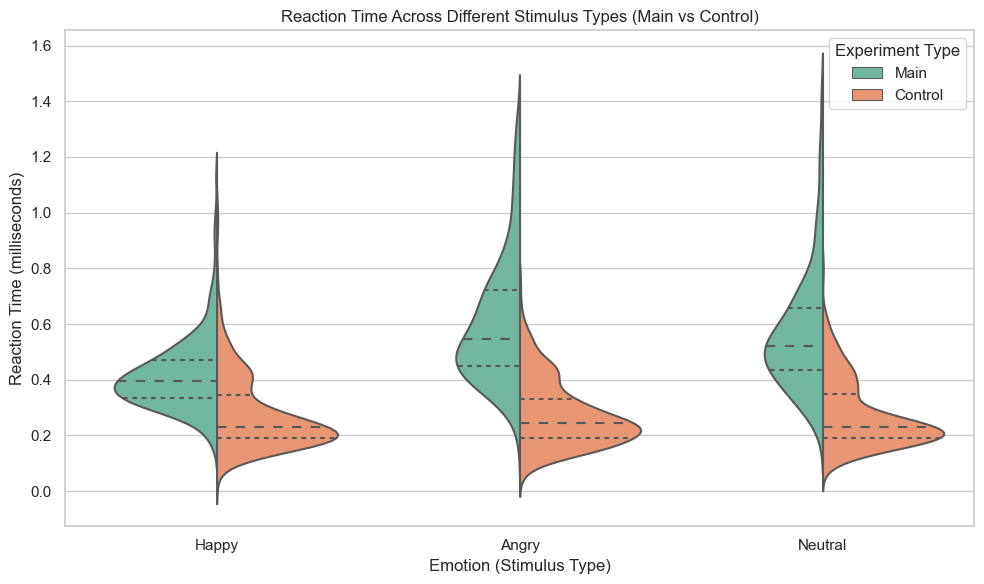

In [316]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_folder = "/Users/shamiksinha/Desktop/cmm assignment/dataset/14"
 
reaction_times_main = {'E1': [], 'E2': [], 'E3': []}
reaction_times_control = {'E1': [], 'E2': [], 'E3': []}

def extract_reaction_times(file_path, experiment_type, block): 
    df = pd.read_csv(file_path)
     
    reaction_times = pd.to_numeric(df['response_time'], errors='coerce').dropna().values
     
    if experiment_type == 'Main':
        reaction_times_main[block].extend(reaction_times)
    elif experiment_type == 'Control':
        reaction_times_control[block].extend(reaction_times)
 
for participant_folder in os.listdir(data_folder):
    participant_path = os.path.join(data_folder, participant_folder)
    if os.path.isdir(participant_path):
        for experiment_type in ['Main', 'Control']:
            experiment_path = os.path.join(participant_path, experiment_type)
            if os.path.isdir(experiment_path):
                for block in ['E1', 'E2', 'E3']:
                    block_path = os.path.join(experiment_path, block, 'Copy of target.csv')
                    if os.path.isfile(block_path):
                        extract_reaction_times(block_path, experiment_type, block)
 
reaction_times_df = pd.DataFrame({
    'Reaction Time': [],
    'Stimulus Type': [],
    'Experiment Type': []
})
 
for i, block in enumerate(['E1', 'E2', 'E3']):
    for experiment_type, reaction_times in zip(['Main', 'Control'], [reaction_times_main, reaction_times_control]):
        temp_df = pd.DataFrame({
            'Reaction Time': reaction_times[block],
            'Stimulus Type': [block] * len(reaction_times[block]),
            'Experiment Type': [experiment_type] * len(reaction_times[block])
        })
         
        reaction_times_df = pd.concat([reaction_times_df, temp_df], ignore_index=True)
 
reaction_times_df['Stimulus Type'] = reaction_times_df['Stimulus Type'].map({'E1': 'Happy', 'E2': 'Angry', 'E3': 'Neutral'})
sns.set(style="whitegrid")   
plt.figure(figsize=(10, 6))
sns.violinplot(data=reaction_times_df, x='Stimulus Type', y='Reaction Time', hue='Experiment Type', split=True, inner="quart", palette="Set2")
 
plt.xlabel('Emotion (Stimulus Type)')
plt.ylabel('Reaction Time (milliseconds)')
plt.title('Reaction Time Across Different Stimulus Types (Main vs Control)')
 
plt.tight_layout()
plt.show()


/var/folders/yt/h8g2tq612_99wzrx5yrmx9bm0000gn/T/ipykernel_32312/1338657813.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reaction_times_df = pd.concat([reaction_times_df, temp_df], ignore_index=True)


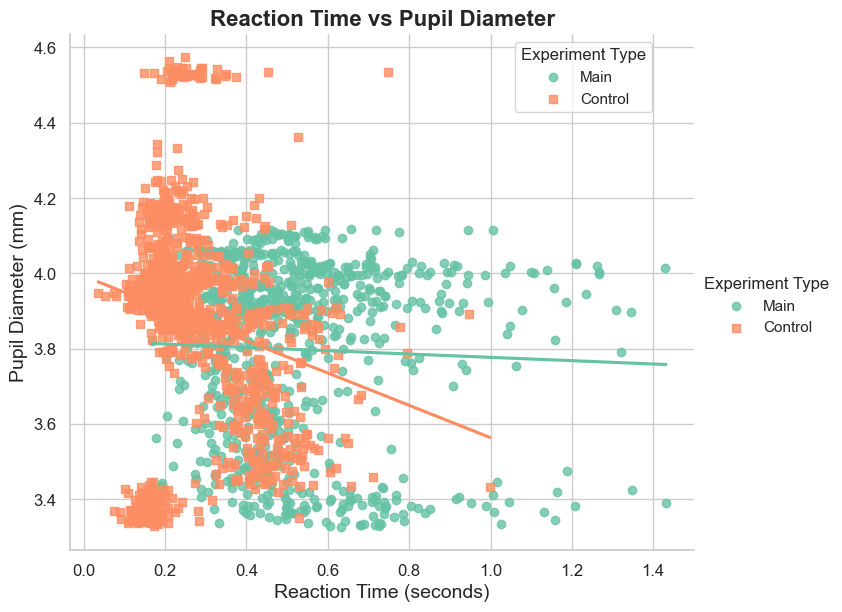

In [317]:
import seaborn as sns
reaction_times_df = pd.DataFrame(columns=['Reaction Time', 'Pupil Diameter', 'Experiment Type']) 

for block in ['E1', 'E2', 'E3']:
    for experiment_type, reaction_times, pupil_data in zip(['Main', 'Control'], [reaction_times_main, reaction_times_control], [avg_pupil_main, avg_pupil_control]):
        min_length = min(len(reaction_times[block]), len(pupil_data[block])) 
        trimmed_reaction_times = reaction_times[block][:min_length]
        trimmed_pupil_data = pupil_data[block].values[:min_length] 
        temp_df = pd.DataFrame({
            'Reaction Time': trimmed_reaction_times,
            'Pupil Diameter': trimmed_pupil_data,
            'Experiment Type': [experiment_type] * min_length
        }) 
        reaction_times_df = pd.concat([reaction_times_df, temp_df], ignore_index=True)

reaction_times_df.dropna(subset=['Reaction Time', 'Pupil Diameter'], inplace=True)
 
reaction_pupil_df = pd.DataFrame({
    'Reaction Time': reaction_times_df['Reaction Time'],
    'Pupil Diameter': reaction_times_df['Pupil Diameter'],
    'Experiment Type': reaction_times_df['Experiment Type']
}) 

sns.set(style="whitegrid")   
sns.lmplot(x='Reaction Time', y='Pupil Diameter', hue='Experiment Type', 
           data=reaction_pupil_df, aspect=1.2, height=6, 
           markers=['o', 's'], palette='Set2', ci=None)

plt.title('Reaction Time vs Pupil Diameter', fontsize=16, fontweight='bold')
plt.xlabel('Reaction Time (seconds)', fontsize=14)
plt.ylabel('Pupil Diameter (mm)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.legend(loc='upper left', bbox_to_anchor=(0.7, 1), title='Experiment Type')

plt.show() 